In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("ws_orderinfo_orders_app.csv")

In [3]:
data[:10]

,id,carid,red,blue,green,yellow,black,white,arriveAtReceiving,loadedDate,arriveAtShipping,unloadedDate
0,1,4,0.0,3.0,7.0,8.0,6.0,0.0,6/18/18 16:07:49,6/18/18 16:09:59,6/18/18 16:10:25,6/18/18 16:11:00
1,2,12,9.0,2.0,5.0,0.0,8.0,0.0,6/18/18 16:10:06,6/18/18 16:11:07,6/18/18 16:12:09,6/18/18 16:12:56
2,3,4,NaN,NaN,NaN,NaN,NaN,NaN,6/18/18 16:12:00,NaN,NaN,NaN
3,4,4,10.0,1.0,0.0,1.0,2.0,10.0,6/18/18 16:12:08,6/18/18 16:12:59,6/18/18 16:14:00,6/18/18 16:14:39
4,5,12,NaN,NaN,NaN,NaN,NaN,NaN,6/18/18 16:13:53,NaN,NaN,NaN
5,6,12,1.0,5.0,6.0,8.0,0.0,4.0,6/18/18 16:14:01,6/18/18 16:14:46,6/18/18 16:15:33,6/18/18 16:16:30
6,7,4,NaN,NaN,NaN,NaN,NaN,NaN,6/18/18 16:15:27,NaN,NaN,NaN
7,8,4,0.0,8.0,3.0,0.0,9.0,4.0,6/18/18 16:15:32,6/18/18 16:16:26,6/18/18 16:16:47,6/18/18 16:17:26
8,9,12,5.0,3.0,4.0,9.0,1.0,2.0,6/18/18 16:16:45,6/18/18 16:17:37,6/18/18 16:17:52,6/18/18 16:18:37
9,10,4,6.0,2.0,0.0,0.0,8.0,8.0,6/18/18 16:17:48,6/18/18 16:18:41,6/18/18 16:18:52,6/18/18 16:19:23


In [4]:
# We think the line with NaN is the situation that the car has encoutered a problem and the system has to enter the
# maintenance mode. The time period between the NaN line and the following line is the time of maintenance.
nanLines = data.index[data["red"].isna()]

In [5]:
# Get all the NaN lines and the line behind each
nanLines = nanLines.map(lambda x: (x, x + 1))
print nanLines

MultiIndex(levels=[[2, 4, 6, 17, 20, 30, 36, 41, 50, 53, 54], [3, 5, 7, 18, 21, 31, 37, 42, 51, 54, 55]],
           labels=[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]])


In [6]:
# The time period between "arriveAtReceiving" is the maintenance time.
receivings = pd.to_datetime(data["arriveAtReceiving"])
periods = nanLines.map(lambda x: receivings[x[1]] - receivings[x[0]]).to_frame()
periods.index = data["carid"][nanLines.get_level_values(0)]
periods.columns = ["Maintenance Time"]
print periods

      Maintenance Time
carid                 
4             00:00:08
12            00:00:08
4             00:00:05
4             00:00:06
4             00:00:05
12            00:00:07
4             00:00:06
4             00:00:05
4             00:00:16
4             00:00:18
4             00:00:33


In [7]:
# For continuous variables, we have to group them into groups. Here, we set the group as
# [0, 5), [5, 10), [10, 15), ..., [30, 35)
time_ranges = map(lambda x: "[%d, %d)" % (x, x + 5), range(0, 35, 5))
groups = periods["Maintenance Time"].map(lambda x: time_ranges[x.seconds / 5])
grouped = groups.to_frame().groupby(groups).size()
frequency = grouped.to_frame().reindex(time_ranges, fill_value=0)
frequency.columns = ["Frequency"]
print frequency

                  Frequency
Maintenance Time           
[0, 5)                    0
[5, 10)                   8
[10, 15)                  0
[15, 20)                  2
[20, 25)                  0
[25, 30)                  0
[30, 35)                  1


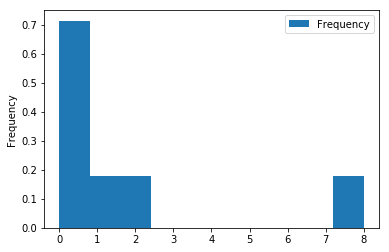

In [8]:
frequency.plot.hist(density=True)